# "Dado um terremoto recém-registrado, este evento tem alto risco de gerar um tsunami?"

In [34]:
import pandas as pd #pd modulo do pandas

In [35]:
df = pd.read_csv("earthquake_data_tsunami.csv")

In [36]:
df.sample(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
241,6.8,6,6,981,0,1.802,17.0,82.00,20.9228,94.5690,2016,8,0
306,6.7,7,7,1016,0,0.727,13.0,22.91,27.7711,86.0173,2015,4,0
274,6.9,6,6,761,0,0.784,32.0,12.00,-29.5067,-72.0068,2015,11,1
204,6.8,6,6,1034,0,1.065,38.0,38.12,13.7174,-90.9718,2017,6,1
622,6.8,5,5,713,551,0.000,26.2,150.00,-15.7980,167.7890,2006,8,0


In [37]:
df.shape

(782, 13)

In [38]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [39]:
print(df.isnull().sum()) #  Verificar valores nulos
print("Quantidade de valores duplicados: ",df.duplicated().sum())

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64
Quantidade de valores duplicados:  0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# OUTLIERS, mas valores reais nao eliminar

<Axes: ylabel='depth'>

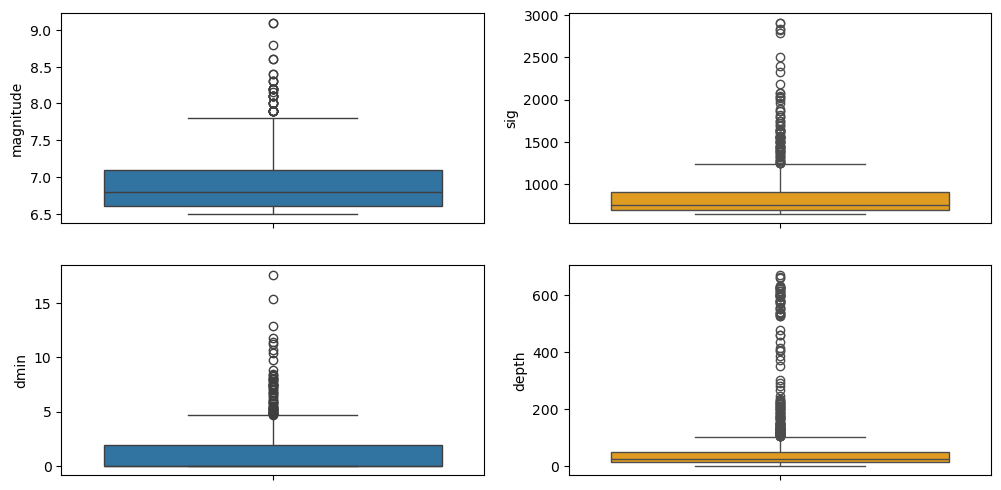

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(data=df['magnitude'])

plt.subplot(2,2,2)
sns.boxplot(data=df['sig'],color='orange')

plt.subplot(2,2,3)
sns.boxplot(data=df['dmin'])

plt.subplot(2,2,4)
sns.boxplot(data=df['depth'],color='orange')

<Axes: xlabel='depth', ylabel='Count'>

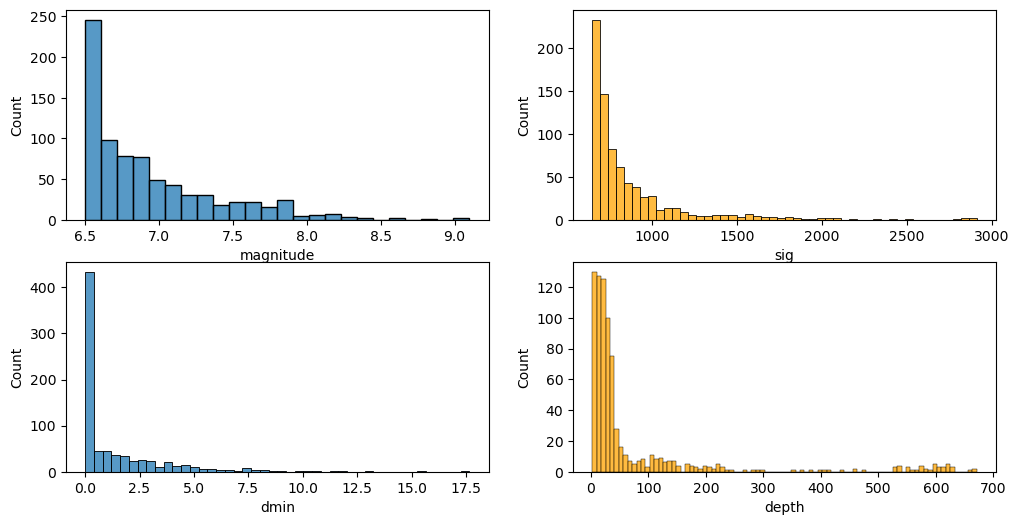

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.histplot(data=df['magnitude'])

plt.subplot(2,2,2)
sns.histplot(data=df['sig'],color='orange')

plt.subplot(2,2,3)
sns.histplot(data=df['dmin'])

plt.subplot(2,2,4)
sns.histplot(data=df['depth'],color='orange')

# DIVISAO DO DATASET

In [43]:
X = df.drop(['tsunami','Year', 'Month'], axis=1)
y = df['tsunami']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=32)

# NORMALIZAR
->RobustScaler() para lidar com outliers
#
->MinMaxScaler() ou StandardScaler() apenas se não houver outliers

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('model', RandomForestClassifier())  # Placeholder, será substituído pelo GridSearch
])

param_grid = [
    # Random Forest
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5]
    },
    # SVC
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 5, 10],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto']
    },
    # Gradient Boosting
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5]
    },
    # Logistic Regression
    {
        'model': [LogisticRegression(max_iter=1000)],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs']
    },
    # K-Nearest Neighbors
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan']
    }
]

search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, verbose=2)
search.fit(Xtrain, ytrain)

modelo_otimo = search.best_estimator_
print("Melhor modelo e parâmetros:")
print(modelo_otimo)
print("Acurácia média (CV):", search.best_score_)


Fitting 10 folds for each of 74 candidates, totalling 740 fits
Melhor modelo e parâmetros:
Pipeline(steps=[('scaler', RobustScaler()),
                ('model', RandomForestClassifier(max_depth=10))])
Acurácia média (CV): 0.8993571011104617


In [47]:
# Avaliação no conjunto de teste
accuracy = modelo_otimo.score(Xtest, ytest)  # retorna acurácia
print("Acurácia no teste:", accuracy)   #Acertos nos testes


from sklearn.metrics import classification_report

y_pred = modelo_otimo.predict(Xtest)
print(classification_report(ytest, y_pred))

Acurácia no teste: 0.9030612244897959
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.86      0.91      0.89        81

    accuracy                           0.90       196
   macro avg       0.90      0.90      0.90       196
weighted avg       0.90      0.90      0.90       196



annot=True → mostra os números dentro das células
#
fmt='d' → formata como inteiro
#
xticklabels/yticklabels → indica quais classes correspondem às linhas e colunas

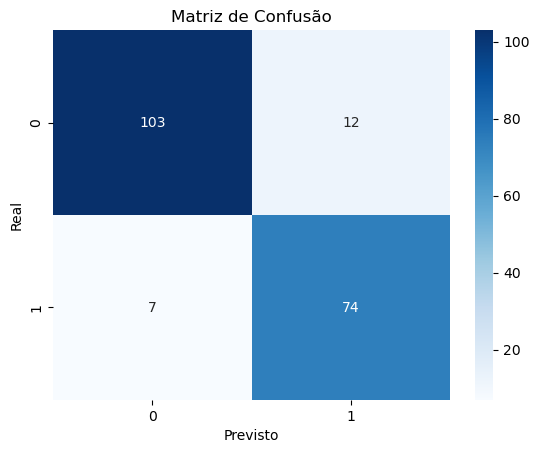

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = modelo_otimo.predict(Xtest)

cm = confusion_matrix(ytest, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# IMPORTANCIA DAS FEATURES

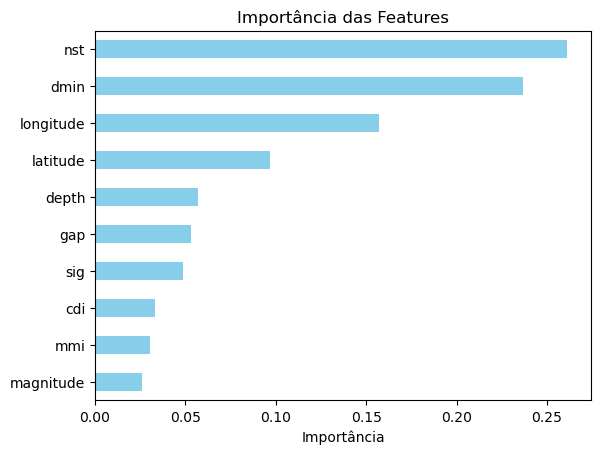

In [49]:
# Extrair importâncias
importances = modelo_otimo.named_steps['model'].feature_importances_

# Criar DataFrame com nomes das features
feature_names = Xtrain.columns  # ou a lista das tuas features
feat_importances = pd.Series(importances, index=feature_names)

# Ordenar e plotar
feat_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.show()

In [50]:
import pandas as pd
import numpy as np

# Supondo que modelo_otimo já foi treinado como no teu pipeline anterior

def prever_tsunami(novo_evento):
    """
    Recebe um dict ou DataFrame com as features de um novo terremoto
    Retorna previsão, probabilidade e features mais importantes
    """
    # Converter dict em DataFrame se necessário
    if isinstance(novo_evento, dict):
        novo_evento = pd.DataFrame([novo_evento])
    
    # Previsão
    pred = modelo_otimo.predict(novo_evento)[0]
    prob = modelo_otimo.predict_proba(novo_evento)[0][1]  # Probabilidade de tsunami
    
    # Importância das features
    importances = modelo_otimo.named_steps['model'].feature_importances_
    feat_importances = pd.Series(importances, index=novo_evento.columns)
    top_features = feat_importances.sort_values(ascending=False).head(5)
    
    resultado = {
        "Previsão (0=não, 1=tsunami)": pred,
        "Probabilidade de tsunami": round(prob, 3),
        "Top 5 features que influenciaram": top_features.to_dict()
    }
    return resultado

# Exemplo de uso
novo_terremoto = {
    "magnitude": 7.8,
    "cdi": 8,
    "mmi": 7,
    "sig": 1800,
    "nst": 100,
    "dmin": 2.5,
    "gap": 30,
    "depth": 15,
    "latitude": -3.2,
    "longitude": 120.5
}

alerta = prever_tsunami(novo_terremoto)
print(alerta)


{'Previsão (0=não, 1=tsunami)': 0, 'Probabilidade de tsunami': 0.366, 'Top 5 features que influenciaram': {'nst': 0.26128374971163043, 'dmin': 0.23680228723547123, 'longitude': 0.1570232029537132, 'latitude': 0.09669280774054455, 'depth': 0.05685316799750589}}
